Com base nos dados demográficos, hábitos de estudo e estilo de vida, podemos prever se um estudante apresenta risco de depressão.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, roc_auc_score, confusion_matrix,classification_report, roc_curve

## - Ler Dataset e imformaçoes basicas

In [5]:

#Carregar dados
df=pd.read_csv("student_depression_dataset.csv")

# Informações gerais do dataset
print("DATASET ORGINAL")
print(f"Dimensoes: {df.shape}")
print(f"Colunas: {df.columns.tolist()}")
# Primeiras linhas do dataset
print(f"\nPrimeiras 5 linhas do dataset:")
display(df.head())    


DATASET ORGINAL
Dimensoes: (27901, 18)
Colunas: ['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Work/Study Hours', 'Financial Stress', 'Family History of Mental Illness', 'Depression']

Primeiras 5 linhas do dataset:


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


## Exploraçao inicial do Dataset  

features disponiveis:['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Work/Study Hours', 'Financial Stress', 'Family History of Mental Illness', 'Depression']

Tipos de dados:


,Coluna,Tipo,Valores Únicos
0,id,int64,27901
1,Gender,object,2
2,Age,float64,34
3,City,object,52
4,Profession,object,14
5,Academic Pressure,float64,6
6,Work Pressure,float64,3
7,CGPA,float64,332
8,Study Satisfaction,float64,6
9,Job Satisfaction,float64,5


                  id           Age  Academic Pressure  Work Pressure  \
count   27901.000000  27901.000000       27901.000000   27901.000000   
mean    70442.149421     25.822300           3.141214       0.000430   
std     40641.175216      4.905687           1.381465       0.043992   
min         2.000000     18.000000           0.000000       0.000000   
25%     35039.000000     21.000000           2.000000       0.000000   
50%     70684.000000     25.000000           3.000000       0.000000   
75%    105818.000000     30.000000           4.000000       0.000000   
max    140699.000000     59.000000           5.000000       5.000000   

               CGPA  Study Satisfaction  Job Satisfaction  Work/Study Hours  \
count  27901.000000        27901.000000      27901.000000      27901.000000   
mean       7.656104            2.943837          0.000681          7.156984   
std        1.470707            1.361148          0.044394          3.707642   
min        0.000000            0.00

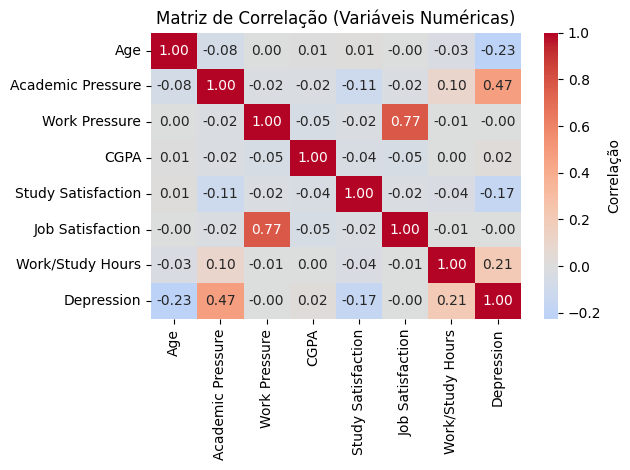

In [ ]:
#features disponiveis no dataset
features =['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction',
            'Job Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
              'Financial Stress', 'Family History of Mental Illness', 'Depression']
print(f"features disponiveis:{features}")

#Tipos de dados
print("\nTipos de dados:")
tipos_dados = pd.DataFrame({
    'Coluna': df.columns,
    'Tipo': df.dtypes.values,
    'Valores Únicos': [df[col].nunique() for col in df.columns]
})
display(tipos_dados)   
print(df.describe())

#valores nulos e duplicados
print(f"Total Valores nulos: {df.isnull().sum().sum()}")
print(f"Valores nulos:\n{df.isnull().sum()}")
print(f"\nLinhas duplicadas: {df.duplicated().sum()}")
print(f"Total de linhas no dataset: {df.shape[0]}") 
  
  
corr_cols = ['Age','Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction',
            'Job Satisfaction','Work/Study Hours', 'Depression']
corr_matrix = df[corr_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, cbar_kws={'label': 'Correlação'})
plt.title('Matriz de Correlação (Variáveis Numéricas)')
plt.tight_layout()

## Clean_up


In [8]:
df_copy=df.copy()
print(f"Features atuais: {list(df_copy.columns)}")
print(f"Valores nulos: {df_copy.isnull().sum().sum()}")
print(f"Linhas duplicadas: {df_copy.duplicated().sum()}")
print(f"Total de linhas no dataset: {df.shape[0]}") 

#features numericas
numericas =df_copy.select_dtypes(include=[np.number]).columns.tolist()

print(f"\nfeatures numericas:{numericas}")
df_copy[numericas] = df_copy[numericas].fillna(df_copy[numericas].median())
print(f"valores nulos preenchidos com mediana")
#features categoricas
categoricas=df_copy.select_dtypes(include=['object']).columns.tolist()
print(f"\nfeatures categoricas:{categoricas}")
df_copy[categoricas] = df_copy[categoricas].fillna(df_copy[categoricas].mode().iloc[0])
print(f"valores nulos preenchidos com moda")

# verificar nulos apos novas features
print(f"Total de valores nulos depois da limpeza: {df_copy.isnull().sum().sum()}")

# Remover colunas redundantes/desnecessárias
cols_to_drop = ['id',#nao vai ser necessario para a previsao 
                'City',# para ser menos limitante mais generalizado 
                'Profession',# para ser menos limitante mais generalizado 
                'Degree',# para ser menos limitante mais generalizado 
                'Work Pressure',
                'Job Satisfaction'
                ]
df_copy = df_copy.drop(columns=[c for c in cols_to_drop if c in df_copy.columns])
print(f"\nColunas removidas: {cols_to_drop}")
print(f"Features finais: {list(df_copy.columns)}")


print(f"\nPrimeiras 5 linhas do dataset:")
display(df_copy.head())   
print(f"\nDataset após pré-processamento: {df_copy.shape}")
print(f"Colunas finais ({len(df_copy.columns)}):")
for i, col in enumerate(df_copy.columns, 1):
    if col =='Depression':
     print(f"{i}. {col}(target)")
    else:
       print(f"{i}. {col}")

Features atuais: ['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Work/Study Hours', 'Financial Stress', 'Family History of Mental Illness', 'Depression']
Valores nulos: 0
Linhas duplicadas: 0
Total de linhas no dataset: 27901

features numericas:['id', 'Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 'Depression']
valores nulos preenchidos com mediana

features categoricas:['Gender', 'City', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Financial Stress', 'Family History of Mental Illness']
valores nulos preenchidos com moda
Total de valores nulos depois da limpeza: 0

Colunas removidas: ['id', 'City', 'Profession', 'Degree', 'Work Pressure', 'Job Satisfaction']
Features finais: ['Gender', 'Age'

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,5.0,8.97,2.0,'5-6 hours',Healthy,Yes,3.0,1.0,No,1
1,Female,24.0,2.0,5.90,5.0,'5-6 hours',Moderate,No,3.0,2.0,Yes,0
2,Male,31.0,3.0,7.03,5.0,'Less than 5 hours',Healthy,No,9.0,1.0,Yes,0
3,Female,28.0,3.0,5.59,2.0,'7-8 hours',Moderate,Yes,4.0,5.0,Yes,1
4,Female,25.0,4.0,8.13,3.0,'5-6 hours',Moderate,Yes,1.0,1.0,No,0



Dataset após pré-processamento: (27901, 12)
Colunas finais (12):
1. Gender
2. Age
3. Academic Pressure
4. CGPA
5. Study Satisfaction
6. Sleep Duration
7. Dietary Habits
8. Have you ever had suicidal thoughts ?
9. Work/Study Hours
10. Financial Stress
11. Family History of Mental Illness
12. Depression(target)


## ANÁLISE DA VARIÁVEL TARGET 'Depression'

Valores únicos em 'Depression': [1 0]
Tipo de dados: int64

Distribuição de 'Depression':
Depression
1    58.549873
0    41.450127
Name: proportion, dtype: float64


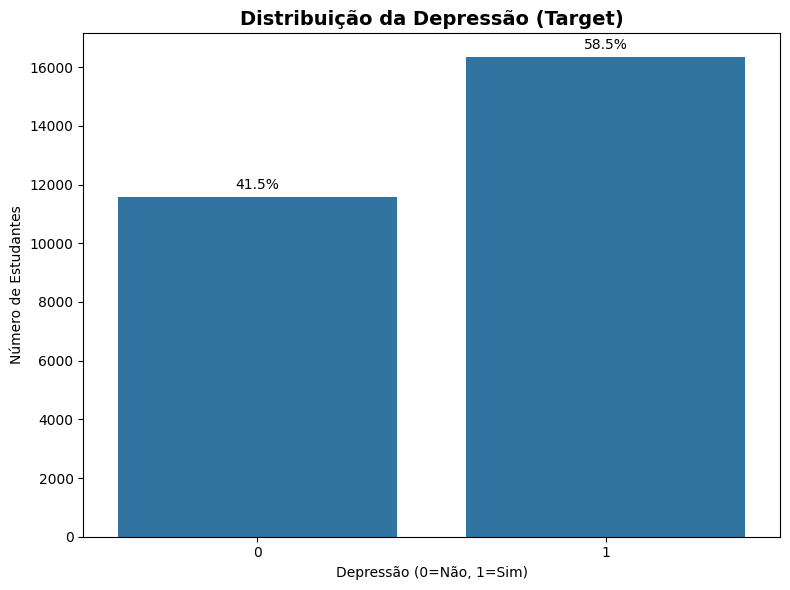

In [11]:
# Verificar valores únicos
print(f"Valores únicos em 'Depression': {df_copy['Depression'].unique()}")
print(f"Tipo de dados: {df_copy['Depression'].dtype}")

# Distribuição
depression_dist = df_copy['Depression'].value_counts(normalize=True) * 100
print(f"\nDistribuição de 'Depression':")
print(depression_dist)

# Visualizar
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df_copy, x='Depression')
plt.title('Distribuição da Depressão (Target)', fontsize=14, fontweight='bold')
plt.xlabel('Depressão (0=Não, 1=Sim)')
plt.ylabel('Número de Estudantes')

# Adicionar porcentagens
total = len(df_copy)
for p in ax.patches:
    percentage = f'{100 * p.get_height()/total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y_height = p.get_height()
    ax.annotate(percentage, (x, y_height + total*0.01), ha='center')

plt.tight_layout()
plt.show()


## Preparaçao de dados

In [ ]:
 # Identificar categóricas
categorical_features = df_copy.select_dtypes(include=['object']).columns.tolist()
numerical_features = df_copy.select_dtypes(include=[np.number]).columns.tolist()

print(f"\nVariáveis Categóricas ({len(categorical_features)}):")
print(f"  {categorical_features}")
print(f"\nVariáveis Numéricas ({len(numerical_features)}):")
print(f"  {numerical_features}")

## Encodign de features categoricas

In [ ]:
# Criar cópia para não afetar original
df_encoded = df_copy.copy()

#VARIÁVEIS BINÁRIAS - LabelEncoder
print("\n" + "="*40)
print("VARIÁVEIS BINÁRIAS")
print("="*40)
binary_cols = ['Gender','Family History of Mental Illness','Have you ever had suicidal thoughts ?']

for col in binary_cols:
    if col in df_encoded.columns:
        le = LabelEncoder()
        encoded_col = f"{col}_encoded"
        df_encoded[encoded_col] = le.fit_transform(df_encoded[col].astype(str))
       
        
        print(f"\n{col}:")
        print(f"   Original: {df_encoded[col].unique()}")
        print(f"   Encoded:  {df_encoded[encoded_col].unique()}")

#VARIÁVEIS ORDINAIS -Mapeamento manual
print("\n" + "="*40)
print("VARIÁVEIS ORDINAIS")
print("="*40)

#Sleep Duration
if 'Sleep Duration' in df_encoded.columns:
    print(f"\nSleep Duration - Ordem lógica:")
    # Primeiro: limpar as aspas extras
    df_encoded['Sleep Duration'] = df_encoded['Sleep Duration'].str.replace("'", "")
    
    # Mapeamento(ordem crescente de horas)
    sleep_mapping = {
        'Less than 5 hours': 1,    # Muito pouco
        '5-6 hours': 2,            # Pouco
        '7-8 hours': 3,            # Normal/Recomendado
        'More than 8 hours': 4,    # Muito
        'Others': 2.5              # Intermediário (como pode ser mais ou menos)
    }
    
    df_encoded['Sleep Duration_encoded'] = df_encoded['Sleep Duration'].map(sleep_mapping)
    print(f"   Mapeamento aplicado: {sleep_mapping}")
    print(f"   Valores únicos após: {sorted(df_encoded['Sleep Duration_encoded'].unique())}")

# Dietary Habits
if 'Dietary Habits' in df_encoded.columns:
    print(f"\nDietary Habits - Ordem de saúde:")
    
    dietary_mapping = {
        'Unhealthy': 1,     # Menos saudável
        'Others': 2,        # Neutro/Desconhecido
        'Moderate': 3,      # Moderado
        'Healthy': 4        # Mais saudável
    }
    
    df_encoded['Dietary Habits_encoded'] = df_encoded['Dietary Habits'].map(dietary_mapping) 
    print(f"   Mapeamento aplicado: {dietary_mapping}")
    print(f"   Valores únicos após: {sorted(df_encoded['Dietary Habits_encoded'].unique())}")

#Financial Stress
if 'Financial Stress' in df_encoded.columns:
    print(f"\nFinancial Stress - Escala 1-5:")
    
    # Converter para string para tratamento uniforme
    df_encoded['Financial Stress'] = df_encoded['Financial Stress'].astype(str)
    
    financial_mapping = {
        '1.0': 1, '1': 1,   # Baixo stress
        '2.0': 2, '2': 2,
        '3.0': 3, '3': 3,   # Moderado
        '4.0': 4, '4': 4,
        '5.0': 5, '5': 5,   # Alto stress
        '?': 3,   # Tratar como moderado
    }
    
    df_encoded['Financial Stress_encoded'] = df_encoded['Financial Stress'].map(financial_mapping)
    print(f"   Mapeamento aplicado: {financial_mapping}")
    print(f"   Valores únicos após: {sorted(df_encoded['Financial Stress_encoded'].unique())}")


#REMOVER COLUNAS ORIGINAIS CATEGÓRICAS
print("\n" + "="*60)
print("LIMPEZA E ORGANIZAÇÃO FINAL")
print("="*60)

# Listar todas as colunas codificadas criadas
encoded_columns = [col for col in df_encoded.columns if '_encoded' in col or '_freq' in col or '_target' in col]
print(f"\nColunas codificadas criadas ({len(encoded_columns)}):")
for col in encoded_columns:
    print(f"   • {col}")

#remover colunas originais categóricas
cols_to_drop = [col for col in categorical_features if col in df_encoded.columns]
df_encoded = df_encoded.drop(columns=cols_to_drop, errors='ignore')

print(f"\nColunas categóricas originais removidas: {cols_to_drop}")

# Verificar resultado final
print(f"\nDataset após encoding:")
print(f"Shape: {df_encoded.shape}")
print(f"Colunas: {list(df_encoded.columns)}")
print(f"Tipos de dados:")
print(df_encoded.dtypes.value_counts())

## Divisao de dados 

In [ ]:
# Remover coluna target das features
X = df_encoded.drop('Depression', axis=1)
#variável target
y = df_encoded['Depression'].copy()

print(f"Shape final:")
print(f"  X (features): {X.shape}")
print(f"  y (target): {y.shape}")

# Verificar tipos de dados em X
print(f"\nTipos de dados em X:")
print(X.dtypes.value_counts())

## Treinar dados

In [ ]:
# Dividir mantendo proporção das classes (stratify)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f" Divisão estratificada:")
print(f"Treino: {X_train.shape[0]} amostras ({X_train.shape[0]/len(X):.1%})")
print(f"Teste:  {X_test.shape[0]} amostras ({X_test.shape[0]/len(X):.1%})")

print(f"\n Distribuição no Treino:")
train_dist = y_train.value_counts(normalize=True) * 100
print(f"Classe 0: {train_dist[0]:.1f}%")
print(f"Classe 1: {train_dist[1]:.1f}%")

print(f"\nDistribuição no Teste:")
test_dist = y_test.value_counts(normalize=True) * 100
print(f"Classe 0: {test_dist[0]:.1f}%")
print(f"Classe 1: {test_dist[1]:.1f}%")

## Ramdom forest para modelo de regressao

Porque Random forest?
- lida bem com features mistas(numéricas + categóricas)
- Captura relações não-lineares
- Robusto a outliers

 

## - NORMALIZAÇÃO DAS FEATURES NUMÉRICA

In [ ]:
print("\n" + "="*60)
print("NORMALIZAÇÃO DAS FEATURES")
print("="*60)
# Identificar colunas numéricas
num_cols = X.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()

# Aplicar apenas nas colunas numéricas
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])

print(f"{len(num_cols)} features numéricas normalizadas:")
for col in num_cols:
  print(f"{col}")

## - TREINAR MODELO RANDOM FOREST

In [ ]:
print("\n" + "="*60)
print("TREINAMENTO DO RANDOM FOREST")
print("="*60)

# Criar modelo com configuração inicial
rf_model = RandomForestClassifier(
    n_estimators=100,           # Número de árvores
    max_depth=10,             # Profundidade máxima
    min_samples_split=10,        # Mínimo de amostras para dividir
    min_samples_leaf=5,         # Mínimo de amostras nas folhas
    max_features='sqrt',
    random_state=42,            # Reprodutibilidade
    n_jobs=-1,                  # Usar todos os processadores
    class_weight='balanced'     # Lidar com desbalanceamento (se houver)
)

print(" Treinando Random Forest...")
rf_model.fit(X_train_scaled, y_train)

print(f" Modelo treinado com {rf_model.n_estimators} árvores")
print(f" Features importantes consideradas: {rf_model.max_features}")

## - AVALIAÇÃO DO MODELO

In [ ]:

print("\n" + "="*60)
print("AVALIAÇÃO DO MODELO")
print("="*60)
# Previsões
y_train_pred = rf_model.predict(X_train_scaled)
y_train_proba = rf_model.predict_proba(X_train_scaled)[:, 1]

y_test_pred = rf_model.predict(X_test_scaled)
y_test_proba = rf_model.predict_proba(X_test_scaled)[:, 1]

print("PERFORMANCE NO TREINO:")
print(f"  Acurácia:  {accuracy_score(y_train, y_train_pred):.4f}")
print(f"   Precisão:  {precision_score(y_train, y_train_pred):.4f}")
print(f"  Recall:    {recall_score(y_train, y_train_pred):.4f}")
print(f"  F1-Score:  {f1_score(y_train, y_train_pred):.4f}")
print(f"  AUC-ROC:   {roc_auc_score(y_train, y_train_proba):.4f}")

print("\nPERFORMANCE NO TESTE:")
print(f"  Acurácia:  {accuracy_score(y_test, y_test_pred):.4f}")
print(f"  Precisão:  {precision_score(y_test, y_test_pred):.4f}")
print(f"  Recall:    {recall_score(y_test, y_test_pred):.4f}")
print(f"  F1-Score:  {f1_score(y_test, y_test_pred):.4f}")
print(f"  AUC-ROC:   {roc_auc_score(y_test, y_test_proba):.4f}")


#Visualização dos resultados

print("\n" + "="*60)
print("VISUALIZAÇÃO DOS RESULTADOS")
print("="*60)

#Matriz de Confusão
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Sem Depressão', 'Com Depressão'],
            yticklabels=['Sem Depressão', 'Com Depressão'])
plt.title('Matriz de Confusão - Random Forest', fontsize=16, fontweight='bold')
plt.ylabel('Real', fontsize=12)
plt.xlabel('Previsto', fontsize=12)
plt.tight_layout()
plt.savefig('matriz_confusao.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nMatriz de Confusão:")
print(f"  Verdadeiros Negativos (VN): {cm[0, 0]} - Previu não depressão e era não depressão")
print(f"  Falsos Positivos (FP):     {cm[0, 1]} - Previu depressão mas era não depressão")
print(f"  Falsos Negativos (FN):     {cm[1, 0]} - Previu não depressão mas era depressão")
print(f"  Verdadeiros Positivos (VP): {cm[1, 1]} - Previu depressão e era depressão")

#Relatório de Classificação
print("\nRELATÓRIO DE CLASSIFICAÇÃO DETALHADO:")
print(classification_report(y_test, y_test_pred,
                           target_names=['Sem Depressão', 'Com Depressão']))

#Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = roc_auc_score(y_test, y_test_proba)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'Random Forest (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Classificador Aleatório')
plt.fill_between(fpr, tpr, alpha=0.2, color='darkorange')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos', fontsize=12)
plt.ylabel('Taxa de Verdadeiros Positivos', fontsize=12)
plt.title('Curva ROC - Random Forest para Depressão Estudantil', fontsize=16, fontweight='bold')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('curva_roc.png', dpi=300, bbox_inches='tight')
plt.show()

## ANÁLISE DAS VARIÁVEIS MAIS IMPORTANTES

In [ ]:

print("\n" + "="*60)
print("ANÁLISE DAS VARIÁVEIS MAIS IMPORTANTES")
print("="*60)

# Obter importâncias
feature_importance = pd.DataFrame({
    'Variável': X.columns,
    'Importância': rf_model.feature_importances_
}).sort_values('Importância', ascending=False)

# Visualizar top 15
plt.figure(figsize=(12, 10))
top_features = feature_importance.head(15)
bars = plt.barh(range(len(top_features)), top_features['Importância'])
plt.yticks(range(len(top_features)), top_features['Variável'])
plt.xlabel('Importância', fontsize=12)
plt.title('Top Variáveis para Previsão de Depressão', fontsize=16, fontweight='bold')
plt.gca().invert_yaxis()  # Maior importância no topo

# Adicionar valores nas barras
for i, (bar, importance) in enumerate(zip(bars, top_features['Importância'])):
    plt.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2,
             f'{importance:.4f}', va='center', fontsize=10)

plt.tight_layout()
plt.savefig('importancia_variaveis.png', dpi=300, bbox_inches='tight')
plt.show()

## Resumo do modelo criado 

In [ ]:
print("\n" + "="*60)
print("RESUMO FINAL E CONCLUSÕES")
print("="*60)

# Calcular métricas finais
acuracia = accuracy_score(y_test, y_test_pred)
precisao = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
auc_score = roc_auc_score(y_test, y_test_proba)

print(f"""
 RESULTADO DO MODELO DE PREVISÃO DE DEPRESSÃO

 DADOS UTILIZADOS:
   - Total de estudantes: {df.shape[0]}
   - Com depressão: {sum(y == 1)} ({sum(y == 1)/len(y):.1%})
   - Sem depressão: {sum(y == 0)} ({sum(y == 0)/len(y):.1%})
   - Variáveis preditoras: {X.shape[1]}

 MODELO RANDOM FOREST:
   - Número de árvores: {rf_model.n_estimators}
   - Variáveis por split: {rf_model.max_features}
   - Balanceamento: {'Sim' if rf_model.class_weight else 'Não'}

 DESEMPENHO NO TESTE:
   - Acurácia:  {acuracia:.2%}
   - Precisão:  {precisao:.2%} (dos previstos como depressão, quantos realmente têm)
   - Recall:    {recall:.2%} (dos que têm depressão, quantos foram identificados)
   - F1-Score:  {f1:.2%} (média harmônica entre precisão e recall)
   - AUC-ROC:   {auc_score:.2%} (capacidade de discriminar entre classes)

 FATORES MAIS IMPORTANTES:
   1. {feature_importance.iloc[0]['Variável']} ({feature_importance.iloc[0]['Importância']:.3%})
   2. {feature_importance.iloc[1]['Variável']} ({feature_importance.iloc[1]['Importância']:.3%})
   3. {feature_importance.iloc[2]['Variável']} ({feature_importance.iloc[2]['Importância']:.3%})

 IMPLICAÇÕES PRÁTICAS:
   - O modelo pode identificar {recall:.1%} dos estudantes com depressão
   - {precisao:.1%} das previsões positivas são corretas
   - Focando nos fatores mais importantes, podemos criar programas preventivos
""")


## Previsao 


In [ ]:
##Faz a previsao com os dados fornecidos
def fazer_previsao(dados_aluno):

    # Garantir que temos todas as colunas necessarias
    colunas_necessarias = X.columns.tolist()
    
    # Criar DataFrame com os dados
    dados_df = pd.DataFrame([dados_aluno])
    
    # Adicionar colunas faltantes (se houver)
    for col in colunas_necessarias:
        if col not in dados_df.columns:
            print(f"Aviso: Coluna '{col}' nao fornecida. Usando valor medio.")
            if col in X.columns:
                dados_df[col] = X[col].mean()
    
    # Reordenar colunas
    dados_df = dados_df[colunas_necessarias]
    
    # Normalizar dados
    dados_normalizados = dados_df.copy()
    dados_normalizados[num_cols] = scaler.transform(dados_df[num_cols])
    
    # Fazer previsao
    probabilidade = rf_model.predict_proba(dados_normalizados)[0][1]
    predicao = rf_model.predict(dados_normalizados)[0]
    
    return predicao, probabilidade

## Funcao para prever depressao 
def prever_depressao_aluno(dados_aluno_dict):
    # Verificar se temos todas as colunas necessarias
    colunas_obrigatorias = [
        'Age', 'Gender_encoded', 'CGPA', 'Academic Pressure',
        'Study Satisfaction', 'Work/Study Hours', 'Sleep Duration_encoded',
        'Dietary Habits_encoded', 'Have you ever had suicidal thoughts ?_encoded',
        'Financial Stress_encoded', 'Family History of Mental Illness_encoded'
    ]
    
    # Verificar colunas faltantes
    faltantes = [col for col in colunas_obrigatorias if col not in dados_aluno_dict]
    if faltantes:
        print(f"Aviso: Colunas faltantes: {faltantes}")
        print("   Usando valores medios para colunas faltantes...")
        
        # Adicionar valores medios para colunas faltantes
        for col in faltantes:
            if col in X.columns:
                dados_aluno_dict[col] = X[col].mean()
            else:
                # Valor padrao baseado no tipo de variavel
                if 'encoded' in col:
                    dados_aluno_dict[col] = 0
                elif 'Pressure' in col or 'Satisfaction' in col:
                    dados_aluno_dict[col] = 5.0
                else:
                    dados_aluno_dict[col] = 0
    
    # Fazer previsao
    predicao, probabilidade = fazer_previsao(dados_aluno_dict)
    
    # Criar resultado estruturado
    resultado = {
        'tem_depressao': bool(predicao),
        'probabilidade_depressao': float(probabilidade),
        'probabilidade_percentual': float(probabilidade * 100),
        'risco': 'ALTO' if predicao == 1 else 'BAIXO',
        'recomendacao': 'Avaliacao psicologica recomendada' if predicao == 1 else 'Manter acompanhamento',
        'dados_analisados': len(dados_aluno_dict)
    }
    
    return resultado

## Sistema interativo para prever depressao
def sistema_previsao():
    print("=" * 60)
    print("SISTEMA DE PREVISAO DE DEPRESSAO ESTUDANTIL")
    print("=" * 60)
    print("\nForneca os dados do aluno abaixo:\n")
    
    dados_aluno = {}
    
    # Dados que precisam ser fornecidos
    dados_aluno['Age'] = float(input("Idade do aluno (ex: 21.0): "))
    dados_aluno['Gender_encoded'] = int(input("Genero (0=Feminino, 1=Masculino): "))
    dados_aluno['CGPA'] = float(input("Nota media CGPA (0-10, ex: 7.5): "))
    dados_aluno['Academic Pressure'] = float(input("Pressao Academica (1-10): "))
    dados_aluno['Study Satisfaction'] = float(input("Satisfacao com Estudos (1-10): "))
    dados_aluno['Work/Study Hours'] = float(input("Horas de estudo/trabalho por dia (ex: 8.0): "))
    
    print("\nQualidade do Sono (1-4):")
    print("1 = Menos de 5 horas")
    print("2 = 5-6 horas")
    print("3 = 7-8 horas")
    print("4 = Mais de 8 horas")
    dados_aluno['Sleep Duration_encoded'] = int(input("Escolha (1-4): "))
    
    print("\nHabitos Alimentares (1-4):")
    print("1 = Nao saudavel")
    print("2 = Outros")
    print("3 = Moderado")
    print("4 = Saudavel")
    dados_aluno['Dietary Habits_encoded'] = int(input("Escolha (1-4): "))
    
    dados_aluno['Have you ever had suicidal thoughts ?_encoded'] = int(input("Pensamentos suicidas? (0=Nao, 1=Sim): "))
    dados_aluno['Financial Stress_encoded'] = float(input("Estresse Financeiro (1-5): "))
    dados_aluno['Family History of Mental Illness_encoded'] = int(input("Historico familiar doenca mental? (0=Nao, 1=Sim): "))
    
    # Fazer previsao
    resultado = prever_depressao_aluno(dados_aluno)
    
    # Mostrar resultado
    print("\n" + "=" * 60)
    print("RESULTADO DA PREVISAO")
    print("=" * 60)
    
    print(f"\nPrevisao: {'COM DEPRESSAO' if resultado['tem_depressao'] else 'SEM DEPRESSAO'}")
    print(f"Probabilidade: {resultado['probabilidade_percentual']:.1f}%")
    print(f"Nivel de Risco: {resultado['risco']}")

    return resultado

## Exemplos de uso do sistema
def exemplos():
    print("\n" + "=" * 60)
    print("EXEMPLOS DE USO DO SISTEMA")
    print("=" * 60)
    
    # Exemplo 1: Aluno com alto risco
    print("\nEXEMPLO 1: Aluno com multiplos fatores de risco")
    exemplo_alto_risco = {
        'Age': 20.0,
        'Gender_encoded': 1,
        'CGPA': 6.2,
        'Academic Pressure': 9.0,
        'Study Satisfaction': 3.0,
        'Work/Study Hours': 10.0,
        'Sleep Duration_encoded': 1,
        'Dietary Habits_encoded': 1,
        'Have you ever had suicidal thoughts ?_encoded': 1,
        'Financial Stress_encoded': 4.0,
        'Family History of Mental Illness_encoded': 1
    }
    
    resultado1 = prever_depressao_aluno(exemplo_alto_risco)
    print(f"\nResultado: {'DEPRESSAO' if resultado1['tem_depressao'] else 'Sem depressao'}")
    print(f"Probabilidade: {resultado1['probabilidade_percentual']:.1f}%")
    print(f"Risco: {resultado1['risco']}")
    
    # Exemplo 2: Aluno com baixo risco
    print("\nEXEMPLO 2: Aluno com baixo risco")
    exemplo_baixo_risco = {
        'Age': 22.0,
        'Gender_encoded': 0,
        'CGPA': 8.5,
        'Academic Pressure': 4.0,
        'Study Satisfaction': 8.0,
        'Work/Study Hours': 6.0,
        'Sleep Duration_encoded': 3,
        'Dietary Habits_encoded': 4,
        'Have you ever had suicidal thoughts ?_encoded': 0,
        'Financial Stress_encoded': 2.0,
        'Family History of Mental Illness_encoded': 0
    }
    
    resultado2 = prever_depressao_aluno(exemplo_baixo_risco)
    print(f"\nResultado: {'DEPRESSAO' if resultado2['tem_depressao'] else 'Sem depressao'}")
    print(f"Probabilidade: {resultado2['probabilidade_percentual']:.1f}%")
    print(f"Risco: {resultado2['risco']}")

## Menu principal interativo
def menu_principal():
  
    while True:
        print("\n" + "=" * 60)
        print("SISTEMA DE PREVISAO DE DEPRESSAO ESTUDANTIL")
        print("=" * 60)
        print("\nEscolha uma opcao:")
        print("\n1. Fazer previsao para um aluno")
        print("2. Ver exemplos de uso")
        print("3. Sair")
        
        opcao = input("\nOpcao: ")
        
        if opcao == "1":
            sistema_previsao()
            
            # Perguntar se quer fazer outra previsao
            continuar = input("\nDeseja fazer outra previsao? (s/n): ")
            if continuar.lower() != 's':
                break
        
        elif opcao == "2":
            exemplos()
            input("\nPressione Enter para continuar...")
        
        elif opcao == "3":
            print("\nObrigado por usar o sistema!")
            break
        
        else:
            print("Opcao invalida. Tente novamente.")

#------------------------------------------

# Iniciar menu
menu_principal()
